<a href="https://colab.research.google.com/github/123ranika/Research-paper/blob/main/Multiclass_Text_Classification_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import librares**

In [1]:
!pip install Keras-Preprocessing
!pip install keras==2.11.0
!pip install tensorflow==2.11.0
!pip install --upgrade ktrain


In [2]:
#!pip install Keras-Preprocessing
import numpy as np
import pandas as pd
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#from keras.preprocessing.text import Tokenizer
#from keras.models import Sequential, load_model
#from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
#from keras_preprocessing.sequence import pad_sequences
#from keras.utils.np_utils import to_categorical
#from keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Activation, Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Flatten, GRU, Conv1D, MaxPooling1D, Bidirectional

from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import re
!pip install ktrain
import ktrain
from ktrain import text
sns.set()
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('gutenberg')
nltk.download('brown')
nltk.download("reuters")
nltk.download('words')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 67.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 46.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 38.6 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316932 sha256=8b2fd8141450b74de4eb865af5bc5087cf337fb054568e16071d8932c775b496
  Stored in directory: /root/.cache/pip/wheels/fa/6a/9c/8a873b38bbd8bc207d33c64726bd18f7ef85f8e70dc3ac2e4b
  Created wheel for keras_bert: filename=ke

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

### **Load Dataset**

In [3]:
df=pd.read_csv("/content/Traning.xlsx - Sheet1 (7).csv")
#df['category'].value_counts()
df.head()

,PID,text,labels
0,1,সীমালঙ্ঘন কারীকে আল্লাহ ক্ষমা করেন না,Religious_Hatred
1,2,বর্ণবাদী হলে কি কফির রঙও আপনাকে বিরক্ত করবে?,Racism
2,3,এই ধর্মের জন্য সমাজে কোনো উন্নতি নেই।,Religious_Hatred
3,4,জিবনে কি বালডা ছিরলাম,Cyberbullying
4,5,"টিকটকার রাই সুখে আছে, না আছে ব্রেইন না আছে ব্র...",Sarcasm


In [7]:
import pandas as pd

# Function to rename a single column
def change_column_name(df, old_name, new_name):
    df = df.rename(columns={old_name: new_name})
    return df

# Assuming df is your DataFrame
df = change_column_name(df, old_name="text", new_name="text")
df = change_column_name(df, old_name="labels", new_name="category")
print(df.head())  # Display the first few rows of the DataFrame
#text

   PID                                               text          category
0    1              সীমালঙ্ঘন কারীকে আল্লাহ ক্ষমা করেন না  Religious_Hatred
1    2       বর্ণবাদী হলে কি কফির রঙও আপনাকে বিরক্ত করবে?            Racism
2    3              এই ধর্মের জন্য সমাজে কোনো উন্নতি নেই।  Religious_Hatred
3    4                              জিবনে কি বালডা ছিরলাম     Cyberbullying
4    5  টিকটকার রাই সুখে আছে, না আছে ব্রেইন না আছে ব্র...           Sarcasm


In [8]:
df.to_csv("bbc-text.csv", index=False)

In [9]:
df['category'].value_counts()

,count
category,
Cyberbullying,1686
Sarcasm,1518
Political,776
Gender_Discrimination,678
Religious_Hatred,673
Racism,669


# **Data Cleaning**

In [10]:
df['text']=df['text'].fillna("")
df.isna().sum()

,0
PID,0
text,0
category,0


# **Preprocessing**

In [ ]:
# df['lower_case'] = df['text'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))

# df['alphabatic'] = df['lower_case'].apply(lambda x: re.sub(r'[^a-zA-Z\']', ' ', x)).apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
# df['without-link'] = df['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

# tokenizer = RegexpTokenizer(r'\w+')
# df['Special_word'] = df.apply(lambda row: tokenizer.tokenize(row['lower_case']), axis=1)

# stop = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

# df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in stop])
# df['stop_words'] = df['stop_words'].astype('str')

# df['short_word'] = df['stop_words'].str.findall('\w{2,}')
# df['string']=df['short_word'].str.join(' ')

# df['Text'] = df['string'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [11]:
!pip install bangla
!pip install bangla-stemmer
!pip install nltk


In [12]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from bangla_stemmer.stemmer import stemmer
nltk.download('stopwords')

# Assuming 'df' is your DataFrame and 'text' is the column with Bangla text data
# df = pd.DataFrame({
#     'text': [
#         'আমি বাংলায় গান গাই।',
#         'বাংলা ভাষা মিষ্টি।',
#         'বাংলাদেশ আমার দেশ।'
#     ]
# })

# Step 1: Lowercase and remove unwanted characters (if Bangla text has mixed case Latin)
df['lower_case'] = df['text'].apply(lambda x: x.strip().replace('\n', ' ').replace('\r', ' '))

# Step 2: Removing non-Bangla characters, keeping only Bangla script
df['alphabatic'] = df['lower_case'].apply(lambda x: re.sub(r'[^\u0980-\u09FF\s]', ' ', x))

# Step 3: Removing URLs if present
df['without-link'] = df['alphabatic'].apply(lambda x: re.sub(r'http\S+', '', x))

# Step 4: Tokenizing using regular expressions to split by whitespace
df['Special_word'] = df['without-link'].apply(lambda x: x.split())

# Step 5: Removing Bangla stop words
bangla_stopwords = set(stopwords.words('bengali'))
df['stop_words'] = df['Special_word'].apply(lambda x: [item for item in x if item not in bangla_stopwords])

# Step 6: Keeping words with 2 or more characters
df['short_word'] = df['stop_words'].apply(lambda x: [word for word in x if len(word) > 1])

# Step 7: Join words back to a sentence
df['string'] = df['short_word'].apply(lambda x: ' '.join(x))

# Step 8: Stemming using Bangla stemmer
bangla_stemmer = stemmer.BanglaStemmer()
df['Text'] = df['string'].apply(lambda x: " ".join([bangla_stemmer.stem(word) for word in x.split()]))

# Display the resulting DataFrame
print(df[['text', 'Text']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Streaming output truncated to the last 5000 lines.
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..


In [13]:
df

,PID,text,category,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string,Text
0,1,সীমালঙ্ঘন কারীকে আল্লাহ ক্ষমা করেন না,Religious_Hatred,সীমালঙ্ঘন কারীকে আল্লাহ ক্ষমা করেন না,সীমালঙ্ঘন কারীকে আল্লাহ ক্ষমা করেন না,সীমালঙ্ঘন কারীকে আল্লাহ ক্ষমা করেন না,"[সীমালঙ্ঘন, কারীকে, আল্লাহ, ক্ষমা, করেন, না]","[সীমালঙ্ঘন, কারীকে, আল্লাহ, ক্ষমা]","[সীমালঙ্ঘন, কারীকে, আল্লাহ, ক্ষমা]",সীমালঙ্ঘন কারীকে আল্লাহ ক্ষমা,সীমালঙ্ঘন কারী আল্লাহ ক্ষমা
1,2,বর্ণবাদী হলে কি কফির রঙও আপনাকে বিরক্ত করবে?,Racism,বর্ণবাদী হলে কি কফির রঙও আপনাকে বিরক্ত করবে?,বর্ণবাদী হলে কি কফির রঙও আপনাকে বিরক্ত করবে,বর্ণবাদী হলে কি কফির রঙও আপনাকে বিরক্ত করবে,"[বর্ণবাদী, হলে, কি, কফির, রঙও, আপনাকে, বিরক্ত,...","[বর্ণবাদী, কফির, রঙও, আপনাকে, বিরক্ত]","[বর্ণবাদী, কফির, রঙও, আপনাকে, বিরক্ত]",বর্ণবাদী কফির রঙও আপনাকে বিরক্ত,বর্ণবাদী কফির রঙ আপনা বিরক্ত
2,3,এই ধর্মের জন্য সমাজে কোনো উন্নতি নেই।,Religious_Hatred,এই ধর্মের জন্য সমাজে কোনো উন্নতি নেই।,এই ধর্মের জন্য সমাজে কোনো উন্নতি নেই,এই ধর্মের জন্য সমাজে কোনো উন্নতি নেই,"[এই, ধর্মের, জন্য, সমাজে, কোনো, উন্নতি, নেই]","[ধর্মের, সমাজে, উন্নতি]","[ধর্মের, সমাজে, উন্নতি]",ধর্মের সমাজে উন্নতি,ধর্ম সমাজে উন্নতি
3,4,জিবনে কি বালডা ছিরলাম,Cyberbullying,জিবনে কি বালডা ছিরলাম,জিবনে কি বালডা ছিরলাম,জিবনে কি বালডা ছিরলাম,"[জিবনে, কি, বালডা, ছিরলাম]","[জিবনে, বালডা, ছিরলাম]","[জিবনে, বালডা, ছিরলাম]",জিবনে বালডা ছিরলাম,জিবনে বালডা ছির
4,5,"টিকটকার রাই সুখে আছে, না আছে ব্রেইন না আছে ব্র...",Sarcasm,"টিকটকার রাই সুখে আছে, না আছে ব্রেইন না আছে ব্র...",টিকটকার রাই সুখে আছে না আছে ব্রেইন না আছে ব্র...,টিকটকার রাই সুখে আছে না আছে ব্রেইন না আছে ব্র...,"[টিকটকার, রাই, সুখে, আছে, না, আছে, ব্রেইন, না,...","[টিকটকার, রাই, সুখে, ব্রেইন, ব্রেইন, ক্যান্সার...","[টিকটকার, রাই, সুখে, ব্রেইন, ব্রেইন, ক্যান্সার...",টিকটকার রাই সুখে ব্রেইন ব্রেইন ক্যান্সার হওয়ার...,টিকটক রাই সুখে ব্রেইন ব্রেইন ক্যান্স হওয় চিন্তা
...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,রঙিন চশমা পরে সব শুধু বিম্পি,Political,রঙিন চশমা পরে সব শুধু বিম্পি,রঙিন চশমা পরে সব শুধু বিম্পি,রঙিন চশমা পরে সব শুধু বিম্পি,"[রঙিন, চশমা, পরে, সব, শুধু, বিম্পি]","[রঙিন, চশমা, বিম্পি]","[রঙিন, চশমা, বিম্পি]",রঙিন চশমা বিম্পি,রঙিন চশমা বিম্পি
5996,5997,"111. মেয়েরা শুধু সাজসজ্জার জন্য, অফিসের কাজে ...",Gender_Discrimination,"111. মেয়েরা শুধু সাজসজ্জার জন্য, অফিসের কাজে ...",মেয়েরা শুধু সাজসজ্জার জন্য অফিসের কাজে ...,মেয়েরা শুধু সাজসজ্জার জন্য অফিসের কাজে ...,"[মেয়েরা, শুধু, সাজসজ্জার, জন্য, অফিসের, কাজে,...","[মেয়েরা, সাজসজ্জার, অফিসের]","[মেয়েরা, সাজসজ্জার, অফিসের]",মেয়েরা সাজসজ্জার অফিসের,মেয়ে সাজসজ্জ অফিস
5997,5998,আপু ভুড়ি কমান দেখতে বাজে লাগে,Racism,আপু ভুড়ি কমান দেখতে বাজে লাগে,আপু ভুড়ি কমান দেখতে বাজে লাগে,আপু ভুড়ি কমান দেখতে বাজে লাগে,"[আপু, ভুড়ি, কমান, দেখতে, বাজে, লাগে]","[আপু, ভুড়ি, কমান, বাজে, লাগে]","[আপু, ভুড়ি, কমান, বাজে, লাগে]",আপু ভুড়ি কমান বাজে লাগে,আপু ভুড়ি কমান বাজে লাগে
5998,5999,গরুর গোবর আর পেসাব খাওয়া জাতির মাথায় এর চেয়ে ...,Racism,গরুর গোবর আর পেসাব খাওয়া জাতির মাথায় এর চেয়ে ...,গরুর গোবর আর পেসাব খাওয়া জাতির মাথায় এর চেয়ে ...,গরুর গোবর আর পেসাব খাওয়া জাতির মাথায় এর চেয়ে ...,"[গরুর, গোবর, আর, পেসাব, খাওয়া, জাতির, মাথায়, ...","[গরুর, গোবর, পেসাব, খাওয়া, জাতির, মাথায়, চেয়ে...","[গরুর, গোবর, পেসাব, খাওয়া, জাতির, মাথায়, চেয়ে...",গরুর গোবর পেসাব খাওয়া জাতির মাথায় চেয়ে ভালো ব...,গরুর গোবর পেসাব খাওয়া জাতির মাথায় চায় ভালো বু...


## Visualization

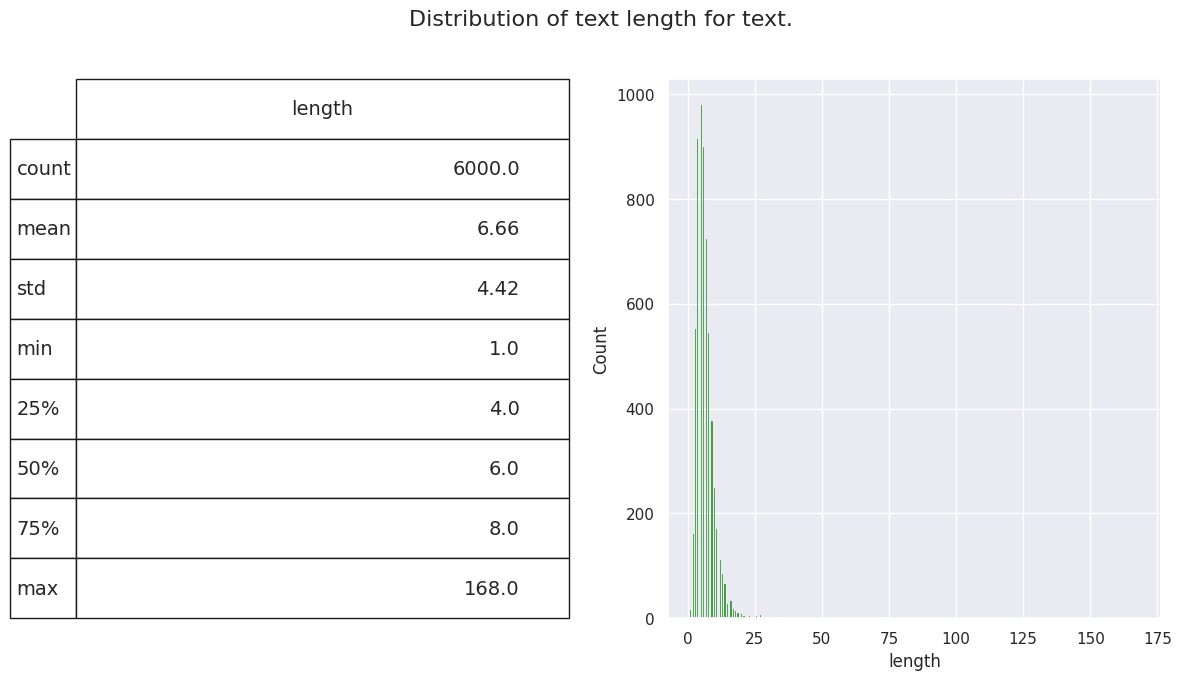

In [14]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

<Axes: xlabel='category', ylabel='count'>

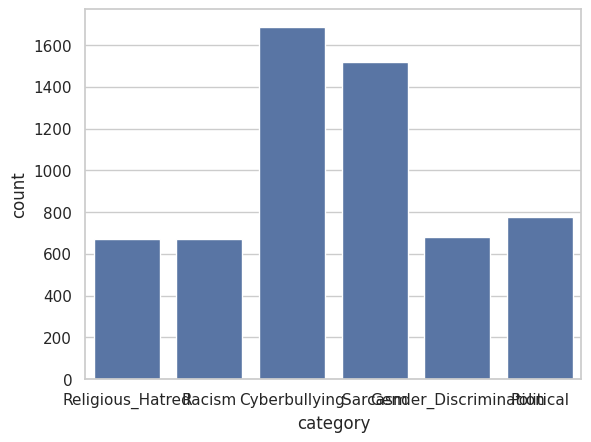

In [15]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df["category"])

In [16]:
top = Counter([item for sublist in df['short_word'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [17]:
df.category.value_counts()

,count
category,
Cyberbullying,1686
Sarcasm,1518
Political,776
Gender_Discrimination,678
Religious_Hatred,673
Racism,669


In [25]:
Cyberbullying = df[df['category']=='Cyberbullying']
Sarcasm = df[df['category']=='Sarcasm']
Political = df[df['category']=='Political']
Gender_Discrimination	 = df[df['category']=='Gender_Discrimination']
Religious_Hatred = df[df['category']=='Religious_Hatred']
Racism = df[df['category']=='Racism']

In [27]:
import pandas as pd
from collections import Counter
import plotly.express as px

# Step 1: Filter the dataset into categories
categories = {
    'Cyberbullying': df[df['category'] == 'Cyberbullying'],
    'Sarcasm': df[df['category'] == 'Sarcasm'],
    'Political': df[df['category'] == 'Political'],
    'Gender_Discrimination': df[df['category'] == 'Gender_Discrimination'],
    'Religious_Hatred': df[df['category'] == 'Religious_Hatred'],
    'Racism': df[df['category'] == 'Racism']
}

# Step 2: Define a function to calculate and visualize most common words
def visualize_common_words(data, category, top_n=20):
    if 'short_word' in data.columns:
        # Flatten the word lists while filtering out empty/invalid rows
        top = Counter([word for sublist in data['short_word'] if isinstance(sublist, list) for word in sublist])

        # Get the most common words
        most_common_words = top.most_common(top_n)

        if most_common_words:
            # Convert to DataFrame
            temp_positive = pd.DataFrame(most_common_words, columns=['Common_words', 'count'])

            # Plot using Plotly
            fig = px.bar(temp_positive,
                         x="count",
                         y="Common_words",
                         title=f'Most Common Words in {category}',
                         orientation='h',
                         width=700,
                         height=700,
                         color='Common_words')
            fig.show()
        else:
            print(f"No common words found in category: {category}")
    else:
        print(f"'short_word' column not found in category: {category}")

# Step 3: Apply the function for each category
for category, data in categories.items():
    print(f"Analyzing category: {category}")
    visualize_common_words(data, category)


Analyzing category: Cyberbullying


Analyzing category: Sarcasm


Analyzing category: Political


Analyzing category: Gender_Discrimination


Analyzing category: Religious_Hatred


Analyzing category: Racism


In [ ]:
top = Counter([item for sublist in business_text['short_word'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in business_text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

In [29]:
from collections import Counter
import pandas as pd
import plotly.express as px

# Check if 'short_word' exists and contains valid data
if 'short_word' in politics_text.columns:
    # Flatten the word lists, skipping invalid rows
    top = Counter([
        item for sublist in politics_text['short_word']
        if isinstance(sublist, list) for item in sublist
    ])

    # Extract the most common 20 words
    most_common_words = top.most_common(20)

    # Check if there are valid words to visualize
    if most_common_words:
        # Create the DataFrame
        temp_positive = pd.DataFrame(most_common_words, columns=['Common_words', 'count'])

        # Plot the bar chart
        fig = px.bar(temp_positive,
                     x="count",
                     y="Common_words",
                     title='Most Common Words in politics_text',
                     orientation='h',
                     width=700,
                     height=700,
                     color='Common_words')
        fig.show()
    else:
        print("No valid words found in the 'short_word' column of politics_text.")
else:
    print("'short_word' column is not found in the politics_text DataFrame.")


No valid words found in the 'short_word' column of politics_text.


In [ ]:
# top = Counter([item for sublist in tech_text['short_word'] for item in sublist])
# temp_positive = pd.DataFrame(top.most_common(20))
# temp_positive.columns = ['Common_words','count']
# fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Words in tech_text', orientation='h',
#              width=700, height=700,color='Common_words')
# fig.show()

In [30]:
bangla_words = [
    'প্রতি', 'দেখা', 'ভালো', 'খেলা', 'সময়', 'পরে', 'আগে', 'হতে', 'যখন', 'কখন', 'জানতে', 'কথা',
    'নিয়ে', 'তখন', 'আমরা', 'নিজে', 'তুমি', 'আপনি', 'কাজ', 'চেষ্টা', 'কোন', 'যদি', 'হয়েছে', 'হচ্ছে',
    'এবং', 'কাছে', 'খুব', 'ভাবি', 'যায়', 'দিয়ে', 'মনে', 'আছে', 'করতে', 'এখানে', 'ওখানে', 'কথায়',
    'বলে', 'অনেক', 'নতুন', 'বেশি', 'আগে', 'শেষ', 'কেন', 'ছাড়া', 'ছোট', 'বড়', 'দুর্ঘটনা', 'দেখিয়ে',
    'যত', 'তত', 'যাও', 'কর', 'আসা', 'যাবে', 'আসবে', 'থাকে', 'নাম', 'বড়', 'মাঝে', 'অল্প', 'দিন',
    'রাত', 'বছর', 'মাস', 'সময়', 'মাঝে', 'দিন', 'এত', 'কম', 'ঠিক', 'অন্য', 'সত্য', 'খবর', 'কারণ',
    'কার', 'কখনো', 'সব', 'যা', 'বেশ', 'জানি', 'কিছু', 'চলে', 'আবার', 'নয়', 'পার', 'মাঝখানে',
    'ধন্যবাদ', 'আমার', 'তোমার', 'উপর', 'নিচে', 'দিক', 'এত', 'তাড়াতাড়ি', 'ধীরে', 'দেখে', 'শুনে',
    'কখনও', 'কখনো', 'যতই'
]


In [31]:
from collections import Counter
import pandas as pd
import plotly.express as px

# Example data
from collections import Counter
import pandas as pd
import plotly.express as px

# Example data
tech_text = pd.DataFrame({
    'short_word': [bangla_words]  # Add the list of Bangla words as a single entry
})



# Step 1: Count the most common words
top = Counter([item for sublist in tech_text['short_word'] for item in sublist])

# Step 2: Create a DataFrame from the most common words
temp_positive = pd.DataFrame(top.most_common(20), columns=['Common_words', 'count'])

# Step 3: Check if temp_positive is not empty before plotting
if not temp_positive.empty:
    fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Common Words in tech_text', orientation='h',
                 width=700, height=700, color='Common_words')
    fig.show()
else:
    print("No common words found in the provided data.")


# Step 1: Count the most common words
top = Counter([item for sublist in tech_text['short_word'] for item in sublist])

# Step 2: Create a DataFrame from the most common words
temp_positive = pd.DataFrame(top.most_common(20), columns=['Common_words', 'count'])

# Step 3: Check if temp_positive is not empty before plotting
if not temp_positive.empty:
    fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Common Words in tech_text', orientation='h',
                 width=700, height=700, color='Common_words')
    fig.show()
else:
    print("No common words found in the provided data.")


In [32]:
from collections import Counter
import pandas as pd
import plotly.express as px

# Example DataFrame (make sure to replace this with your actual data)
entertainment_text = pd.DataFrame({
     'short_word': [bangla_words]
})

# Step 1: Count the most common words
top = Counter([item for sublist in entertainment_text['short_word'] for item in sublist])

# Step 2: Create a DataFrame from the most common words
if top:  # Check if Counter is not empty
    temp_positive = pd.DataFrame(top.most_common(20), columns=['Common_words', 'count'])

    # Step 3: Check if temp_positive is not empty before plotting
    if not temp_positive.empty:
        fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Common Words in entertainment_text',
                     orientation='h', width=700, height=700, color='Common_words')
        fig.show()
    else:
        print("No common words found in the provided data.")
else:
    print("No words found in the entertainment_text['short_word'] column.")


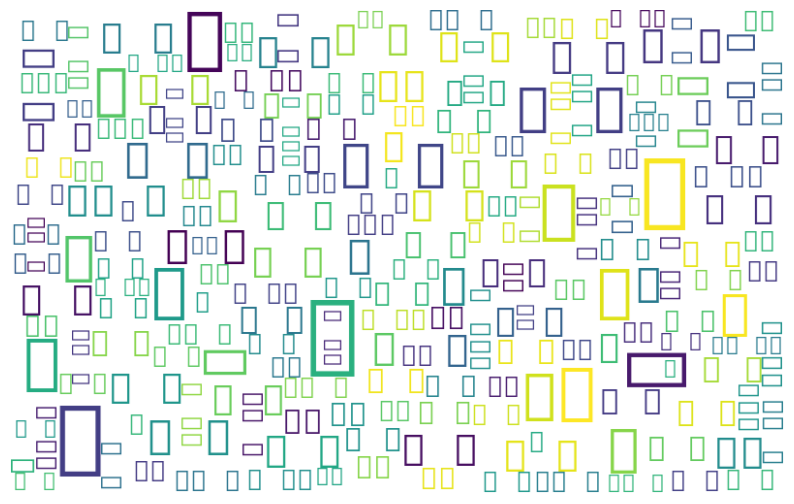

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all Bangla text into a single string
normal_words = ' '.join([text for text in df['Text'] if isinstance(text, str)])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=500,
    random_state=21,
    max_font_size=110,
    background_color='white'  # Set background color to white for better visibility
).generate(normal_words)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Turn off the axis
plt.show()


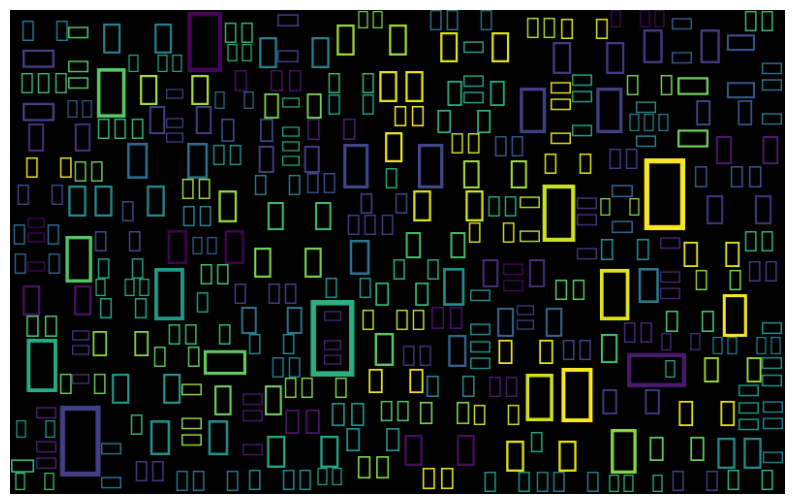

In [37]:
normal_words =' '.join([text for text in df['Text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

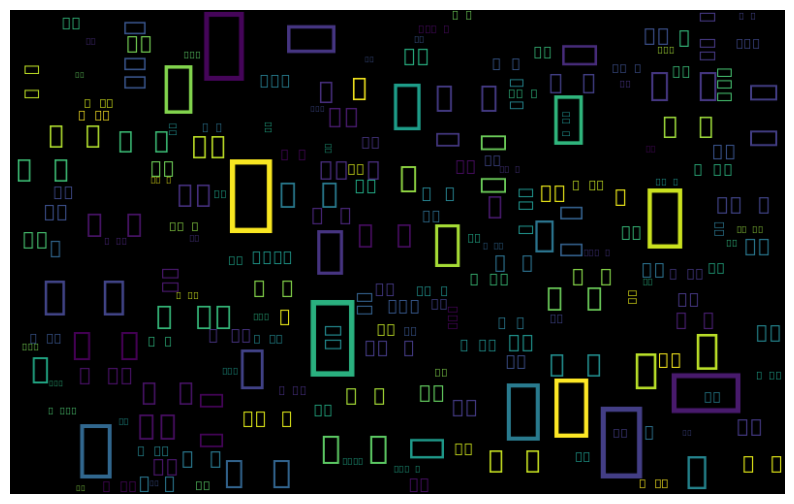

In [39]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Cyberbullying']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

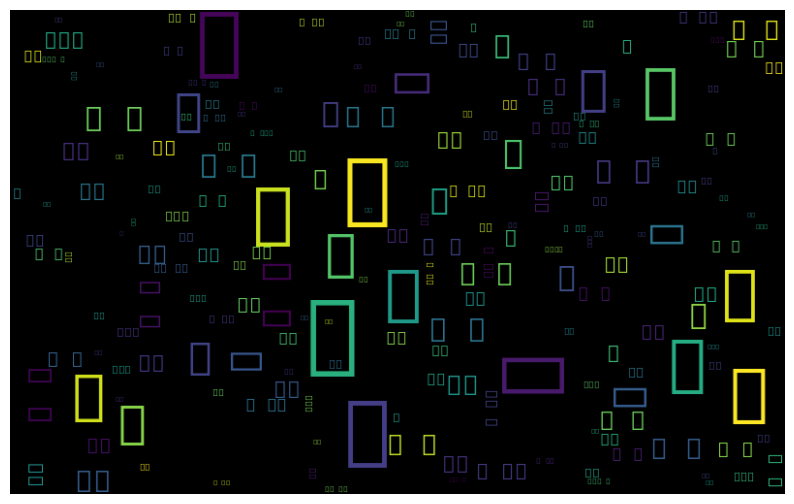

In [40]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Sarcasm']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

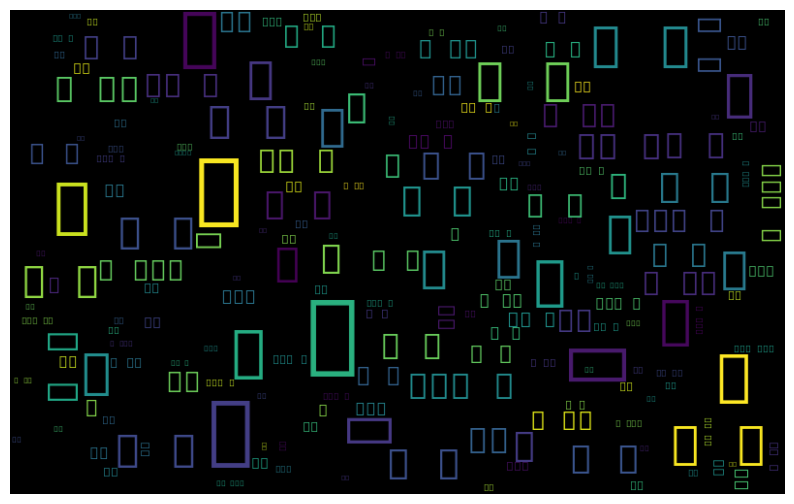

In [41]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Political']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

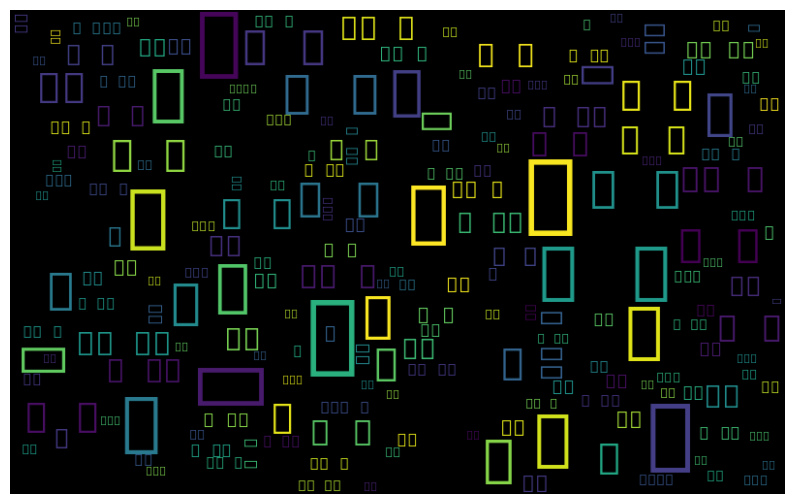

In [42]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Gender_Discrimination']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

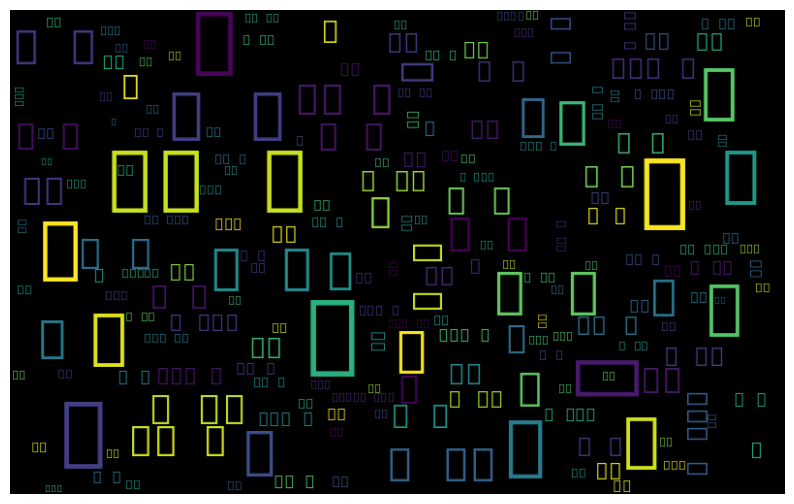

In [43]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Religious_Hatred']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

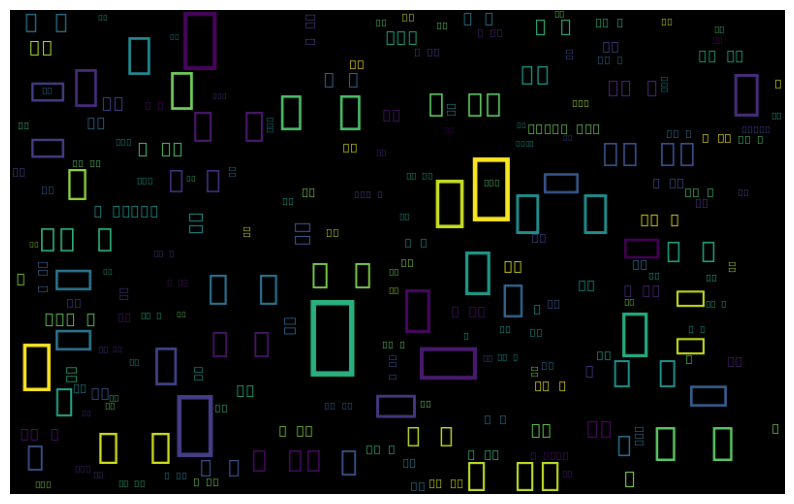

In [44]:
normal_words =' '.join([text for text in df['Text'][df['category'] == 'Racism']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## **Applying N-gram**

In [45]:
x_train, x_test, y_train, y_test = train_test_split(df["Text"],df["category"], test_size = 0.25, random_state = 42)
count_vect = CountVectorizer(ngram_range=(1, 2))
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(4500, 6922) (1500, 6922) (4500,) (1500,)


In [46]:
joblib.dump(count_vect, 'count_vect.pkl')
#model = joblib.load('count_vect.pkl')

['count_vect.pkl']

# **Machine Learning Models**

# **Logistic Regression**

In [47]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.45
                       precision    recall  f1-score   support

        Cyberbullying       0.44      0.50      0.47       429
Gender_Discrimination       0.48      0.25      0.33       166
            Political       0.56      0.41      0.47       184
               Racism       0.54      0.27      0.36       187
     Religious_Hatred       0.74      0.54      0.62       155
              Sarcasm       0.36      0.55      0.43       379

             accuracy                           0.45      1500
            macro avg       0.52      0.42      0.45      1500
         weighted avg       0.48      0.45      0.45      1500



In [48]:
df.head()

,PID,text,category,lower_case,alphabatic,without-link,Special_word,stop_words,short_word,string,Text,length
0,1,সীমালঙ্ঘন কারীকে আল্লাহ ক্ষমা করেন না,Religious_Hatred,সীমালঙ্ঘন কারীকে আল্লাহ ক্ষমা করেন না,সীমালঙ্ঘন কারীকে আল্লাহ ক্ষমা করেন না,সীমালঙ্ঘন কারীকে আল্লাহ ক্ষমা করেন না,"[সীমালঙ্ঘন, কারীকে, আল্লাহ, ক্ষমা, করেন, না]","[সীমালঙ্ঘন, কারীকে, আল্লাহ, ক্ষমা]","[সীমালঙ্ঘন, কারীকে, আল্লাহ, ক্ষমা]",সীমালঙ্ঘন কারীকে আল্লাহ ক্ষমা,সীমালঙ্ঘন কারী আল্লাহ ক্ষমা,6
1,2,বর্ণবাদী হলে কি কফির রঙও আপনাকে বিরক্ত করবে?,Racism,বর্ণবাদী হলে কি কফির রঙও আপনাকে বিরক্ত করবে?,বর্ণবাদী হলে কি কফির রঙও আপনাকে বিরক্ত করবে,বর্ণবাদী হলে কি কফির রঙও আপনাকে বিরক্ত করবে,"[বর্ণবাদী, হলে, কি, কফির, রঙও, আপনাকে, বিরক্ত,...","[বর্ণবাদী, কফির, রঙও, আপনাকে, বিরক্ত]","[বর্ণবাদী, কফির, রঙও, আপনাকে, বিরক্ত]",বর্ণবাদী কফির রঙও আপনাকে বিরক্ত,বর্ণবাদী কফির রঙ আপনা বিরক্ত,8
2,3,এই ধর্মের জন্য সমাজে কোনো উন্নতি নেই।,Religious_Hatred,এই ধর্মের জন্য সমাজে কোনো উন্নতি নেই।,এই ধর্মের জন্য সমাজে কোনো উন্নতি নেই,এই ধর্মের জন্য সমাজে কোনো উন্নতি নেই,"[এই, ধর্মের, জন্য, সমাজে, কোনো, উন্নতি, নেই]","[ধর্মের, সমাজে, উন্নতি]","[ধর্মের, সমাজে, উন্নতি]",ধর্মের সমাজে উন্নতি,ধর্ম সমাজে উন্নতি,7
3,4,জিবনে কি বালডা ছিরলাম,Cyberbullying,জিবনে কি বালডা ছিরলাম,জিবনে কি বালডা ছিরলাম,জিবনে কি বালডা ছিরলাম,"[জিবনে, কি, বালডা, ছিরলাম]","[জিবনে, বালডা, ছিরলাম]","[জিবনে, বালডা, ছিরলাম]",জিবনে বালডা ছিরলাম,জিবনে বালডা ছির,4
4,5,"টিকটকার রাই সুখে আছে, না আছে ব্রেইন না আছে ব্র...",Sarcasm,"টিকটকার রাই সুখে আছে, না আছে ব্রেইন না আছে ব্র...",টিকটকার রাই সুখে আছে না আছে ব্রেইন না আছে ব্র...,টিকটকার রাই সুখে আছে না আছে ব্রেইন না আছে ব্র...,"[টিকটকার, রাই, সুখে, আছে, না, আছে, ব্রেইন, না,...","[টিকটকার, রাই, সুখে, ব্রেইন, ব্রেইন, ক্যান্সার...","[টিকটকার, রাই, সুখে, ব্রেইন, ব্রেইন, ক্যান্সার...",টিকটকার রাই সুখে ব্রেইন ব্রেইন ক্যান্সার হওয়ার...,টিকটক রাই সুখে ব্রেইন ব্রেইন ক্যান্স হওয় চিন্তা,13


In [49]:
mc = count_vect.transform(["তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো"])
m = transformer.transform(mc)
y_pred = lr.predict(m)
print(y_pred)

['Sarcasm']


In [50]:
scores = cross_val_score(lr, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred1))
print ("Cross-validated scores:", scores)

0.45
Cross-validated scores: [0.40222222 0.41333333 0.45777778 0.40666667 0.43555556 0.41333333
 0.42444444 0.42666667 0.43111111 0.38      ]


In [51]:
joblib.dump(lr, 'Text_LR.pkl')
#model = joblib.load('Text_LR.pkl')

['Text_LR.pkl']

# **Support Vector Machine**

In [52]:
svc = LinearSVC()
svc.fit(x_train_tfidf, y_train)
y_pred2 = svc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy: 0.43466666666666665
                       precision    recall  f1-score   support

        Cyberbullying       0.45      0.45      0.45       429
Gender_Discrimination       0.39      0.28      0.33       166
            Political       0.48      0.43      0.46       184
               Racism       0.45      0.30      0.36       187
     Religious_Hatred       0.62      0.54      0.58       155
              Sarcasm       0.37      0.51      0.43       379

             accuracy                           0.43      1500
            macro avg       0.46      0.42      0.43      1500
         weighted avg       0.44      0.43      0.43      1500



In [54]:
mc = count_vect.transform(["দল করে আর ভাত জুটবে না"])
m = transformer.transform(mc)
y_pred = svc.predict(m)
print(y_pred)

['Political']


In [55]:
scores = cross_val_score(svc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred2))
print ("Cross-validated scores:", scores)

0.43466666666666665
Cross-validated scores: [0.38444444 0.40444444 0.46666667 0.44222222 0.43777778 0.44
 0.41777778 0.43777778 0.41111111 0.38444444]


In [56]:
joblib.dump(svc, 'Text_SVM.pkl')
#model = joblib.load('Text_SVM.pkl')

['Text_SVM.pkl']



## **Naive Bayes(Multinomial)**

In [57]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.4066666666666667
                       precision    recall  f1-score   support

        Cyberbullying       0.37      0.77      0.50       429
Gender_Discrimination       0.74      0.08      0.15       166
            Political       0.73      0.26      0.38       184
               Racism       0.87      0.07      0.13       187
     Religious_Hatred       0.76      0.37      0.50       155
              Sarcasm       0.34      0.39      0.36       379

             accuracy                           0.41      1500
            macro avg       0.63      0.32      0.34      1500
         weighted avg       0.55      0.41      0.37      1500



In [58]:
mc = count_vect.transform(["তোমরা সবাই এই ভাই তাকে একটু কোরোভিডিও গুলো"])
m = transformer.transform(mc)
y_pred = mnb.predict(m)
print(y_pred)

['Sarcasm']


In [59]:
scores = cross_val_score(mnb, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred3))
print ("Cross-validated scores:", scores)

0.4066666666666667
Cross-validated scores: [0.36666667 0.39555556 0.39333333 0.36444444 0.39111111 0.36222222
 0.36       0.40222222 0.39555556 0.35555556]


## **Randomforest**


In [60]:
rfc = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=42, class_weight='balanced')
rfc.fit(x_train_tfidf,y_train)
y_pred4 = rfc.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred4)))
print(classification_report(y_test, y_pred4))

Accuracy: 0.4226666666666667
                       precision    recall  f1-score   support

        Cyberbullying       0.48      0.28      0.35       429
Gender_Discrimination       0.32      0.30      0.31       166
            Political       0.60      0.36      0.45       184
               Racism       0.44      0.41      0.42       187
     Religious_Hatred       0.71      0.59      0.64       155
              Sarcasm       0.34      0.61      0.43       379

             accuracy                           0.42      1500
            macro avg       0.48      0.42      0.44      1500
         weighted avg       0.46      0.42      0.42      1500



In [62]:
mc = count_vect.transform(["বর্ণবাদী হলে কি কফির রঙও আপনাকে বিরক্ত করবে?"])
m = transformer.transform(mc)
y_pred = rfc.predict(m)
print(y_pred)

['Racism']


In [63]:
scores = cross_val_score(rfc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred4))
print ("Cross-validated scores:", scores)

0.4226666666666667
Cross-validated scores: [0.40222222 0.41111111 0.46       0.41111111 0.42666667 0.42444444
 0.44       0.43777778 0.44444444 0.41777778]


# **GradientBoostingClassifier**

In [64]:
# gbc = GradientBoostingClassifier(n_estimators=100, max_features='auto', max_depth=4, random_state=1, verbose=1)
# gbc.fit(x_train_tfidf, y_train)
# y_pred5 = gbc.predict(x_test_tfidf)
# print(accuracy_score(y_test, y_pred5))
# print(classification_report(y_test, y_pred5))

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the GradientBoostingClassifier with a valid max_features value
gbc = GradientBoostingClassifier(n_estimators=100, max_features=None, max_depth=4, random_state=1, verbose=1)

# Fit the model on the training data
gbc.fit(x_train_tfidf, y_train)

# Make predictions on the test data
y_pred5 = gbc.predict(x_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))


      Iter       Train Loss   Remaining Time 
         1           1.6451            9.94s
         2           1.6087            9.76s
         3           1.5804            9.91s
         4           1.5583            9.97s
         5           1.5403            9.89s
         6           1.5246            9.74s
         7           1.5104            9.57s
         8           1.4984            9.42s
         9           1.4870            9.29s
        10           1.4768            9.12s
        20           1.4017            7.90s
        30           1.3487            6.79s
        40           1.3092            5.76s
        50           1.2728            4.91s
        60           1.2405            4.09s
        70           1.2083            3.17s
        80           1.1785            2.15s
        90           1.1520            1.06s
       100           1.1267            0.00s
Accuracy: 0.41933333333333334
                       precision    recall  f1-score   support

     

In [66]:
scores = cross_val_score(gbc, x_train_tfidf,y_train, cv=5)
print(accuracy_score(y_test,y_pred5))
print ("Cross-validated scores:", scores)

      Iter       Train Loss   Remaining Time 
         1           1.6425           22.74s
         2           1.6018           22.23s
         3           1.5735           21.82s
         4           1.5516           21.61s
         5           1.5336           21.68s
         6           1.5177           21.35s
         7           1.5031           21.30s
         8           1.4913           21.01s
         9           1.4799           20.83s
        10           1.4669           20.62s
        20           1.3853           18.04s
        30           1.3302           15.66s
        40           1.2897           14.48s
        50           1.2478           13.23s
        60           1.2053           10.32s
        70           1.1678            7.57s
        80           1.1350            4.95s
        90           1.1077            2.43s
       100           1.0837            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.6426           40.95s
        

## **Ensemble Classifier**

In [67]:
mnb = MultinomialNB()
rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
svc = SVC(probability=True)
ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4])
ec.fit(x_train_tfidf,y_train)
y_pred6 = ec.predict(x_test_tfidf)
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

0.454
                       precision    recall  f1-score   support

        Cyberbullying       0.42      0.54      0.47       429
Gender_Discrimination       0.60      0.23      0.33       166
            Political       0.58      0.38      0.46       184
               Racism       0.60      0.25      0.35       187
     Religious_Hatred       0.75      0.56      0.64       155
              Sarcasm       0.37      0.55      0.44       379

             accuracy                           0.45      1500
            macro avg       0.55      0.42      0.45      1500
         weighted avg       0.50      0.45      0.45      1500



In [69]:
mc = count_vect.transform(["যে নির্দয় মন নিয়ে তোমরা তোমাদের মায়ের পিছনে বাঁশ দিয়ে দাঁড়া করাও সেইভাবেই"])
m = transformer.transform(mc)
y_pred = ec.predict(m)
print(y_pred)

['Religious_Hatred']


In [71]:
scores = cross_val_score(ec, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred6))
print ("Cross-validated scores:", scores)

0.454
Cross-validated scores: [0.39555556 0.41333333 0.44222222 0.39777778 0.43777778 0.41111111
 0.41777778 0.43333333 0.42444444 0.37777778]


In [72]:
joblib.dump(ec, 'Text_Ensemble.pkl')
#model = joblib.load('Text_Ensemble.pkl')

['Text_Ensemble.pkl']

## **AdaBoost with Random Forest Classifier**

In [73]:
# rfc = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)
# abc= AdaBoostClassifier(base_estimator=rfc, learning_rate=0.2, n_estimators=100)
# abc.fit(x_train_tfidf, y_train)
# y_pred7= abc.predict(x_test_tfidf)
# print("Accuracy: "+str(accuracy_score(y_test, y_pred7)))
# print(classification_report(y_test, y_pred7))

In [74]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Initialize the AdaBoostClassifier with default base estimator (DecisionTreeClassifier)
abc = AdaBoostClassifier(learning_rate=0.2, n_estimators=100)

# Fit the AdaBoost model on the training data
abc.fit(x_train_tfidf, y_train)

# Make predictions on the test data
y_pred7 = abc.predict(x_test_tfidf)

# Evaluate the model's accuracy and print the classification report
print("Accuracy: " + str(accuracy_score(y_test, y_pred7)))
print(classification_report(y_test, y_pred7))


Accuracy: 0.358
                       precision    recall  f1-score   support

        Cyberbullying       0.32      0.90      0.48       429
Gender_Discrimination       0.67      0.05      0.09       166
            Political       0.72      0.11      0.20       184
               Racism       0.48      0.06      0.11       187
     Religious_Hatred       0.76      0.46      0.58       155
              Sarcasm       0.27      0.10      0.15       379

             accuracy                           0.36      1500
            macro avg       0.54      0.28      0.27      1500
         weighted avg       0.46      0.36      0.28      1500



In [75]:
scores = cross_val_score(abc, x_train_tfidf,y_train, cv=10)
print(accuracy_score(y_test,y_pred7))
print ("Cross-validated scores:", scores)

0.358
Cross-validated scores: [0.35333333 0.33777778 0.37555556 0.36888889 0.36222222 0.35111111
 0.36222222 0.37555556 0.35111111 0.35333333]


# **Comparison Between ML Models**

In [76]:
Comparison_unibi = pd.DataFrame({'Logistic Regression': [accuracy_score(y_test,y_pred1)*100,f1_score(y_test,y_pred1,average='macro')*100,recall_score(y_test, y_pred1,average='micro')*100,precision_score(y_test, y_pred1,average='micro')*100],
                            'SVM':[accuracy_score(y_test,y_pred2)*100,f1_score(y_test,y_pred2,average='macro')*100,recall_score(y_test, y_pred2,average='micro')*100,precision_score(y_test, y_pred2,average='micro')*100],
                           'Naive Bayes':[accuracy_score(y_test,y_pred3)*100,f1_score(y_test,y_pred3,average='macro')*100,recall_score(y_test, y_pred3,average='micro')*100,precision_score(y_test, y_pred3,average='micro')*100],
                           'Random Forest':[accuracy_score(y_test,y_pred4)*100,f1_score(y_test,y_pred4,average='macro')*100,recall_score(y_test, y_pred4,average='micro')*100,precision_score(y_test, y_pred4,average='micro')*100],
                           'GradientBoosting':[accuracy_score(y_test,y_pred5)*100,f1_score(y_test,y_pred5,average='macro')*100,recall_score(y_test, y_pred5,average='micro')*100,precision_score(y_test, y_pred5,average='micro')*100],
                           'Ensembled':[accuracy_score(y_test,y_pred6)*100,f1_score(y_test,y_pred6,average='macro')*100,recall_score(y_test, y_pred6,average='micro')*100,precision_score(y_test, y_pred6,average='micro')*100],
                           'Adaboost':[accuracy_score(y_test,y_pred7)*100,f1_score(y_test,y_pred7,average='macro')*100,recall_score(y_test, y_pred7,average='micro')*100,precision_score(y_test, y_pred7,average='micro')*100],

})

In [77]:
print ('Comparison using uni-bi-gram(1,2)')
Comparison_unibi.rename(index={0:'Accuracy',1:'F1_score', 2: 'Recall',3:'Precision'}, inplace=True)
Comparison_unibi.head()

Comparison using uni-bi-gram(1,2)


,Logistic Regression,SVM,Naive Bayes,Random Forest,GradientBoosting,Ensembled,Adaboost
Accuracy,45.000000,43.466667,40.666667,42.266667,41.933333,45.400000,35.800000
F1_score,44.830156,43.331400,33.660977,43.549080,41.423309,44.966597,26.659711
Recall,45.000000,43.466667,40.666667,42.266667,41.933333,45.400000,35.800000
Precision,45.000000,43.466667,40.666667,42.266667,41.933333,45.400000,35.800000


# **Deep Learning Models**

In [78]:
vocabulary_size = 15000
max_text_len = 768
stemmer = SnowballStemmer('english')
stop_words = [word for word in stopwords.words('english') if word not in ["my","haven't","aren't","can","no", "why", "through", "herself", "she", "he", "himself", "you", "you're", "myself", "not", "here", "some", "do", "does", "did", "will", "don't", "doesn't", "didn't", "won't", "should", "should've", "couldn't", "mightn't", "mustn't", "shouldn't", "hadn't", "wasn't", "wouldn't"]]

In [79]:
def preprocess_text(text):

    text = re.sub('[^a-zA-Z]', ' ', text)

    words = text.lower().split()

    words = [stemmer.stem(word) for word in words if not word in stop_words]

    cleaned_text = ' '.join(words)
    return cleaned_text

df['cleaned_text'] = df['text'].apply(preprocess_text)

In [80]:
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(df['cleaned_text'].values)
le = len(tokenizer.word_index) + 1
print(le)
sequences = tokenizer.texts_to_sequences(df['cleaned_text'].values)
X_DeepLearning = pad_sequences(sequences, maxlen=max_text_len)

23


In [81]:
df.loc[df['category'] == 'Sport' , 'LABEL'] = 0
df.loc[df['category'] == 'Business', 'LABEL'] = 1
df.loc[df['category'] == 'Politics' , 'LABEL'] = 2
df.loc[df['category'] == 'Tech', 'LABEL'] = 3
df.loc[df['category'] == 'Entertainment', 'LABEL'] = 4

labels = to_categorical(df['LABEL'], num_classes=5)
XX_train, XX_test, y_train, y_test = train_test_split(X_DeepLearning , labels, test_size=0.25, random_state=42)
print((XX_train.shape, y_train.shape, XX_test.shape, y_test.shape))

/usr/local/lib/python3.10/dist-packages/pandas/core/series.py:1031: RuntimeWarning:

invalid value encountered in cast



IndexError: index -9223372036854775808 is out of bounds for axis 1 with size 5

# **LSTM 1-Layer**

In [82]:
epochs = 25
emb_dim = 256
batch_size = 50
model_lstm1 = Sequential()
model_lstm1.add(Embedding(vocabulary_size,emb_dim, input_length=X_DeepLearning.shape[1]))
model_lstm1.add(SpatialDropout1D(0.8))
model_lstm1.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout=0.5)))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Flatten())
model_lstm1.add(Dense(64, activation='relu'))
model_lstm1.add(Dropout(0.5))
model_lstm1.add(Dense(5, activation='softmax'))
model_lstm1.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_lstm1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 768, 256)          3840000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 768, 256)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 600)              1336800   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 flatten (Flatten)           (None, 600)               0         
                                                                 
 dense (Dense)               (None, 64)                3

In [83]:
checkpoint_callback = ModelCheckpoint(filepath="lastm-1-layer-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [84]:
history_lstm1 = model_lstm1.fit(XX_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(XX_test,y_test), callbacks=callbacks)

NameError: name 'XX_train' is not defined

In [85]:
results_1 = model_lstm1.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_1[0]} - Accuracy: {100*results_1[1]}%')

NameError: name 'XX_test' is not defined

In [ ]:
acc = history_lstm1.history['acc']
val_acc = history_lstm1.history['val_acc']
loss = history_lstm1.history['loss']
val_loss = history_lstm1.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show()

## **LSTM 2-Layers**

In [ ]:
epochs = 20
emb_dim = 120
batch_size = 50
model_lstm2 = Sequential()
model_lstm2.add(Embedding(vocabulary_size,emb_dim ,input_length=X_DeepLearning.shape[1]))
model_lstm2.add(SpatialDropout1D(0.8))
model_lstm2.add(Bidirectional(LSTM(200, dropout=0.5, recurrent_dropout=0.5, return_sequences= True)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Bidirectional(LSTM(300, dropout=0.5, recurrent_dropout =0.5)))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Flatten())
model_lstm2.add(Dense(64, activation='relu'))
model_lstm2.add(Dropout(0.5))
model_lstm2.add(Dense(5, activation='softmax'))
model_lstm2.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_lstm2.summary())

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="lastm-2-layer-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks2=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_lstm2 = model_lstm2.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(XX_test,y_test), callbacks=callbacks2)

In [ ]:
results_2 = model_lstm2.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_2[0]} - Accuracy: {100*results_2[1]}%')

In [ ]:
acc = history_lstm2.history['acc']
val_acc = history_lstm2.history['val_acc']
loss = history_lstm2.history['loss']
val_loss = history_lstm2.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show()

## **GRU**

In [ ]:
epochs = 20
emb_dim = 256
batch_size = 50
model_gru = Sequential()
model_gru.add(Embedding(vocabulary_size,emb_dim ,input_length=X_DeepLearning.shape[1]))
model_gru.add(SpatialDropout1D(0.8))
model_gru.add(GRU(units=64, dropout=0.2, recurrent_dropout=0.2))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(256, activation='relu'))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(5, activation='softmax'))
model_gru.compile(optimizer=tf.optimizers.Adam(),loss='categorical_crossentropy', metrics=['acc'])
print(model_gru.summary())

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="gru-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks3=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_gru = model_gru.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=(XX_test,y_test), callbacks=callbacks3)

In [ ]:
results_3 = model_gru.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_3[0]} - Accuracy: {100*results_3[1]}%')

In [ ]:
acc = history_gru.history['acc']
val_acc = history_gru.history['val_acc']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()

plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()

plt.show()

## **CNN+LSTM**

In [ ]:
epochs = 20
emb_dim = 256
batch_size = 50
model_cl = Sequential()
model_cl.add(Embedding(vocabulary_size,emb_dim, input_length=X_DeepLearning.shape[1]))
model_cl.add(SpatialDropout1D(0.8))
model_cl.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model_cl.add(MaxPooling1D(pool_size=2))
model_cl.add(Conv1D(filters=32, kernel_size=6, activation='relu'))
model_cl.add(MaxPooling1D(pool_size=2))
model_cl.add(Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
model_cl.add(Dropout(0.5))
model_cl.add(Bidirectional(LSTM(400, dropout=0.5, recurrent_dropout=0.5)))
model_cl.add(Dropout(0.5))
model_cl.add(Flatten())
model_cl.add(Dense(64, activation='relu'))
model_cl.add(Dropout(0.5))
model_cl.add(Dense(5, activation='softmax'))
model_cl.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
print(model_cl.summary())

In [ ]:
checkpoint_callback = ModelCheckpoint(filepath="cnn+lastm-best_model.h5", save_best_only=True, monitor="val_acc", mode="max", verbose=1)

early_stopping_callback = EarlyStopping(monitor="val_acc", mode="max", patience=10, verbose=1, restore_best_weights=True)

reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [ ]:
history_cl = model_cl.fit(XX_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=callbacks)

In [ ]:
results_4 = model_cl.evaluate(XX_test, y_test, verbose=False)
print(f'Test results - Loss: {results_4[0]} - Accuracy: {100*results_4[1]}%')

In [ ]:
acc = history_cl.history['acc']
val_acc = history_cl.history['val_acc']
loss = history_cl.history['loss']
val_loss = history_cl.history['val_loss']
plt.plot( acc, 'go', label='Train accuracy')
plt.plot( val_acc, 'g', label='Validate accuracy')
plt.title('Train and validate accuracy')
plt.legend()

plt.figure()
plt.plot( loss, 'go', label='Train loss')
plt.plot( val_loss, 'g', label='Validate loss')
plt.title('Train and validate loss')
plt.legend()
plt.show()

## **Bert Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.33, random_state=42)

In [ ]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
class_names = ['sport', 'business', 'politics','tech', 'entertainment']

In [ ]:
(x_train,y_train), (x_val,y_val), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=512,
                                                                       max_features=20000)

In [ ]:
model = text.text_classifier('bert', train_data=(x_train,y_train), preproc=preproc)

In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train,y_train),
                             val_data=(x_val,y_val),
                             batch_size=6)

In [ ]:
learner.fit_onecycle(2e-5, 3)

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=(x_val,y_val), class_names=class_names)

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

In [ ]:
message = 'One of the most exciting technological advancements in recent years has been the rise of artificial intelligence (AI) and machine learning (ML) technologies. These technologies have the potential to revolutionize countless industries, from healthcare and finance to manufacturing and transportation.'
prediction = predictor.predict(message)
print('predicted: {}'.format(prediction))

**Save Bert Model**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
predictor.save("/content/drive/MyDrive/Colab_Notebooks/DL Model/Bert_Model_Text_Classification")

**Load Saved Model and Predict**

In [ ]:
predictor1 = ktrain.load_predictor('/content/drive/MyDrive/Colab_Notebooks/DL Model/Bert_Model_Text_Classification')

In [ ]:
data = "One of the biggest challenges facing politicians today is the growing divide between the rich and poor. The concentration of wealth in the hands of a few individuals is a major threat to our democracy, as it allows a small group of people to exert an outsized influence on our political system."
predictor1.predict(data)

# **XLNet Model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.25, random_state=42)

In [ ]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
model_name = 'xlnet-base-cased'
trans = text.Transformer(model_name, maxlen = 512, classes = ['sport', 'business', 'politics','tech', 'entertainment'])

In [ ]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data, batch_size=6)

In [ ]:
learner.fit_onecycle(lr=2e-5, epochs=3)

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=test_data, class_names=trans.get_classes())#Lol, need more gpu memory

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc= trans)
predictor.get_classes()

In [ ]:
predictions = predictor.predict("One of the most exciting technological advancements in recent years has been the rise of artificial intelligence (AI) and machine learning (ML) technologies. These technologies have the potential to revolutionize countless industries, from healthcare and finance to manufacturing and transportation.")
print('predicted: {}'.format(predictions))

In [ ]:
predictor.save("/content/drive/MyDrive/Colab_Notebooks/DL Model/xlnet_model_Text_Classification")

In [ ]:
predictor1 = ktrain.load_predictor('/content/drive/MyDrive/Colab_Notebooks/DL Model/xlnet_model_Text_Classification')

In [ ]:
data = "Politics can be a messy business, but it's essential to the functioning of our society. At its core, politics is about making decisions that affect the lives of millions of people. It's about figuring out how to allocate resources, provide public services, and ensure that everyone has a say in the decisions that affect them."
predictor1.predict(data)